In [40]:
# Load Required Packages
library(plotly)
library(data.table)
library(ggplot2)
library(reshape2)
library(rattle)
library(GGally)

# Session Options
options(repr.plot.width=11, repr.plot.height=7)

In [21]:
# Source Data
dt <- fread('/Users/yassineltahir/Downloads/analysisProblemForInterview.csv', 
            colClasses=list(character=1:7))

# Data Dictionary
dd <- data.table(field=c('Customer_ID','result_rank','provider_Nm','product_name',
                         'dummy_quote_value','Sale_made','Sale_source'),
                meaning=c('unique customer identifier',
                          'the position of the product quoted in the customers results (where 1 is the top result)',
                         'name of the provider',
                         'name of the product',
                         'annual cost of product (AUD)',
                         'indicator of sale',
                         'an indicator of wether the customer purchased online or via a consultant in the call centre'))

dd
head(dt)

field
1:       Customer_ID
2:       result_rank
3:       provider_Nm
4:      product_name
5: dummy_quote_value
6:         Sale_made
7:       Sale_source
                                                                                       meaning
1:                                                                  unique customer identifier
2:     the position of the product quoted in the customers results (where 1 is the top result)
3:                                                                        name of the provider
4:                                                                         name of the product
5:                                                                annual cost of product (AUD)
6:                                                                           indicator of sale
7: an indicator of wether the customer purchased online or via a consultant in the call centre

Customer_ID result_rank provider_Nm product_name dummy_quote_value Sale_made
1:          37           1  Provider A   Product 64            377.09         0
2:          37           2  Provider A Product 3160             60.40         0
3:          37           3  Provider A   Product 56            309.12         0
4:          37           4  Provider A  Product 552            224.30         0
5:          37           5  Provider A Product 3292             79.15         0
6:          37           6  Provider A   Product 76            401.60         0
   Sale_source
1:            
2:            
3:            
4:            
5:            
6:

In [26]:
# Clean & format data
dt$Customer_ID <- as.factor(dt$Customer_ID)
dt$result_rank <- as.numeric(dt$result_rank)
dt$provider_Nm <- as.factor(dt$provider_Nm)
dt$product_name <- as.factor(dt$product_name)
dt$dummy_quote_value <- as.numeric(ifelse(dt$dummy_quote_value == 'MISSING', NA, dt$dummy_quote_value))
dt$Sale_made <- as.factor(dt$Sale_made)
dt$Sale_source <- as.factor(dt$Sale_source)

summary(dt)

  Customer_ID    result_rank        provider_Nm         product_name 
 1661666:  16   Min.   : 1.00   Provider A:3447   Product 84  : 639  
 1685822:  14   1st Qu.: 2.00   Provider B:1240   Product 552 : 599  
 1629520:  12   Median : 4.00                     Product 1412: 596  
 1637948:  12   Mean   : 4.56                     Product 56  : 573  
 1641827:  12   3rd Qu.: 6.00                     Product 3164: 486  
 1659907:  12   Max.   :12.00                     Product 3160: 428  
 (Other):4609                                     (Other)     :1366  
 dummy_quote_value Sale_made     Sale_source  
 Min.   :   0.03   0:4453              :4453  
 1st Qu.: 176.66   1: 234    callcentre: 113  
 Median : 352.35             online    : 121  
 Mean   : 464.54                              
 3rd Qu.: 587.51                              
 Max.   :7204.05                              
 NA's   :18                                   

Warning message:
In fn(x$data, plotObj$mapping): Removed 18 rows containing missing valuesWarning message:
: Removed 18 rows containing missing values (geom_point).Warning message:
: Removed 18 rows containing non-finite values (stat_density).Warning message:
: Removed 18 rows containing non-finite values (stat_boxplot).`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 18 rows containing non-finite values (stat_bin).

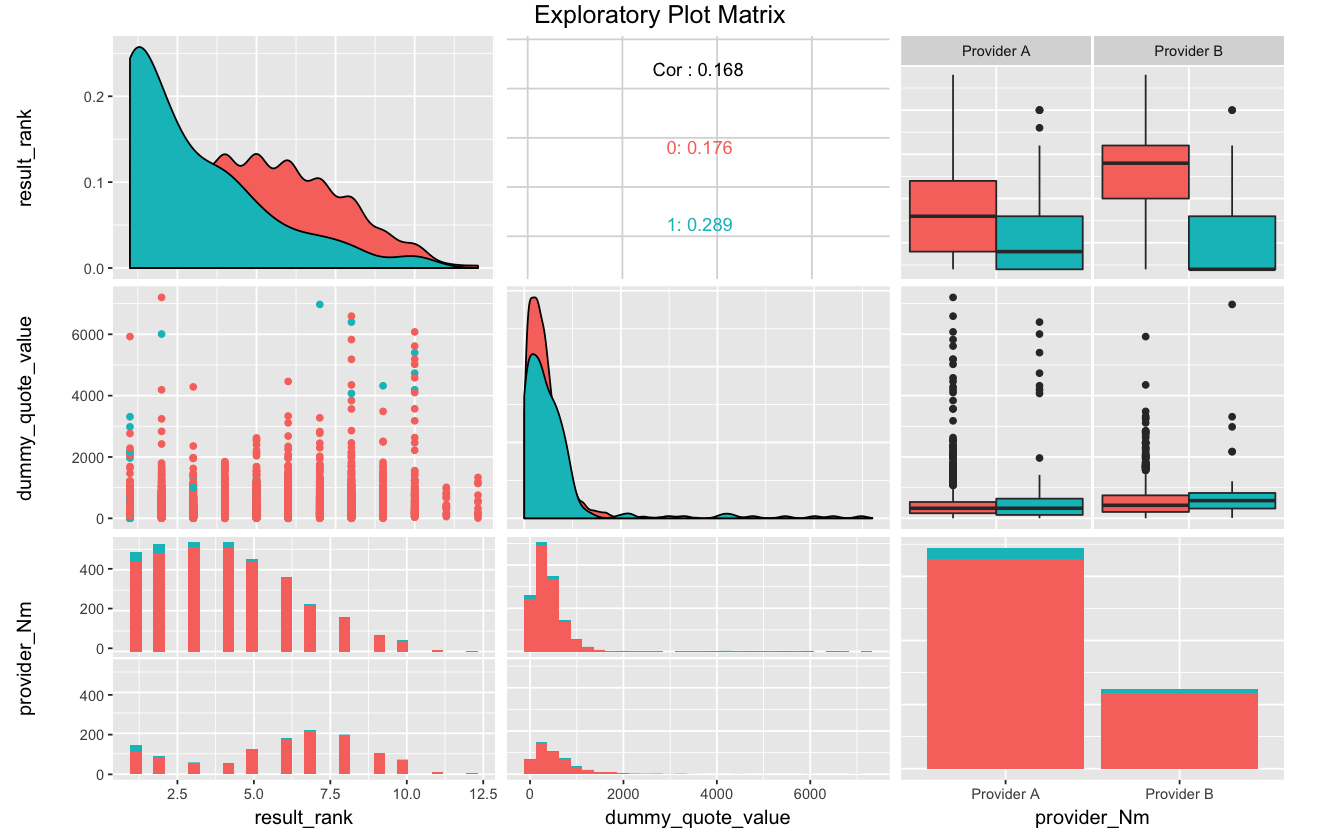

In [44]:
# Against Sale 
ggpairs(data = dt, 
        columns = c('result_rank','dummy_quote_value','provider_Nm'),
        mapping = aes(colour=Sale_made),
        title = 'Exploratory Plot Matrix')

Warning message:
In fn(x$data, plotObj$mapping): Removed 18 rows containing missing valuesWarning message:
: Removed 18 rows containing missing values (geom_point).Warning message:
: Removed 18 rows containing non-finite values (stat_density).Warning message:
: Removed 18 rows containing non-finite values (stat_boxplot).`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 18 rows containing non-finite values (stat_bin).

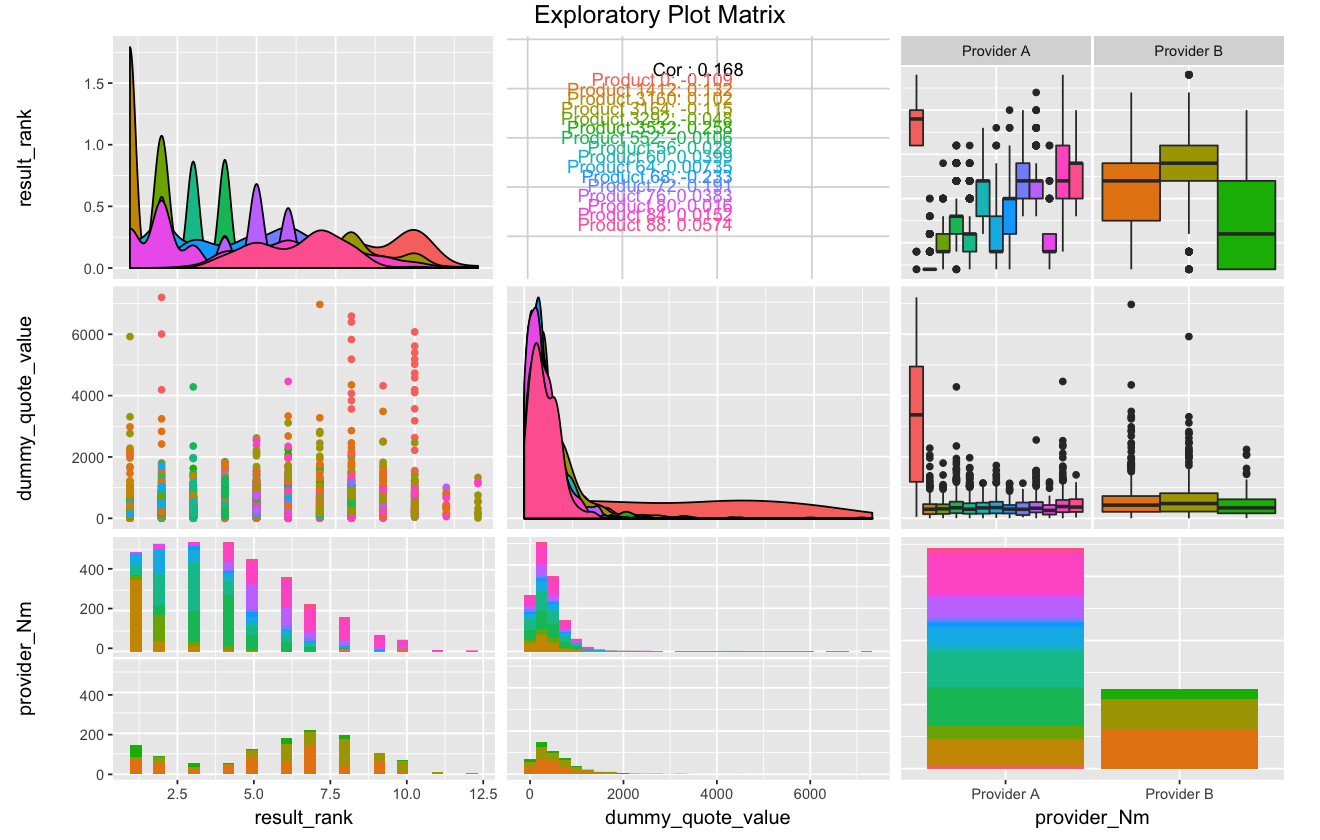

In [45]:
# Against Product Name 
ggpairs(data = dt, 
        columns = c('result_rank','dummy_quote_value','provider_Nm'),
        mapping = aes(colour=product_name),
        title = 'Exploratory Plot Matrix')

Warning message:
In fn(x$data, plotObj$mapping): Removed 2 rows containing missing valuesWarning message:
: Removed 2 rows containing missing values (geom_point).Warning message:
: Removed 2 rows containing non-finite values (stat_density).Warning message:
: Removed 2 rows containing non-finite values (stat_boxplot).`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 2 rows containing non-finite values (stat_bin).

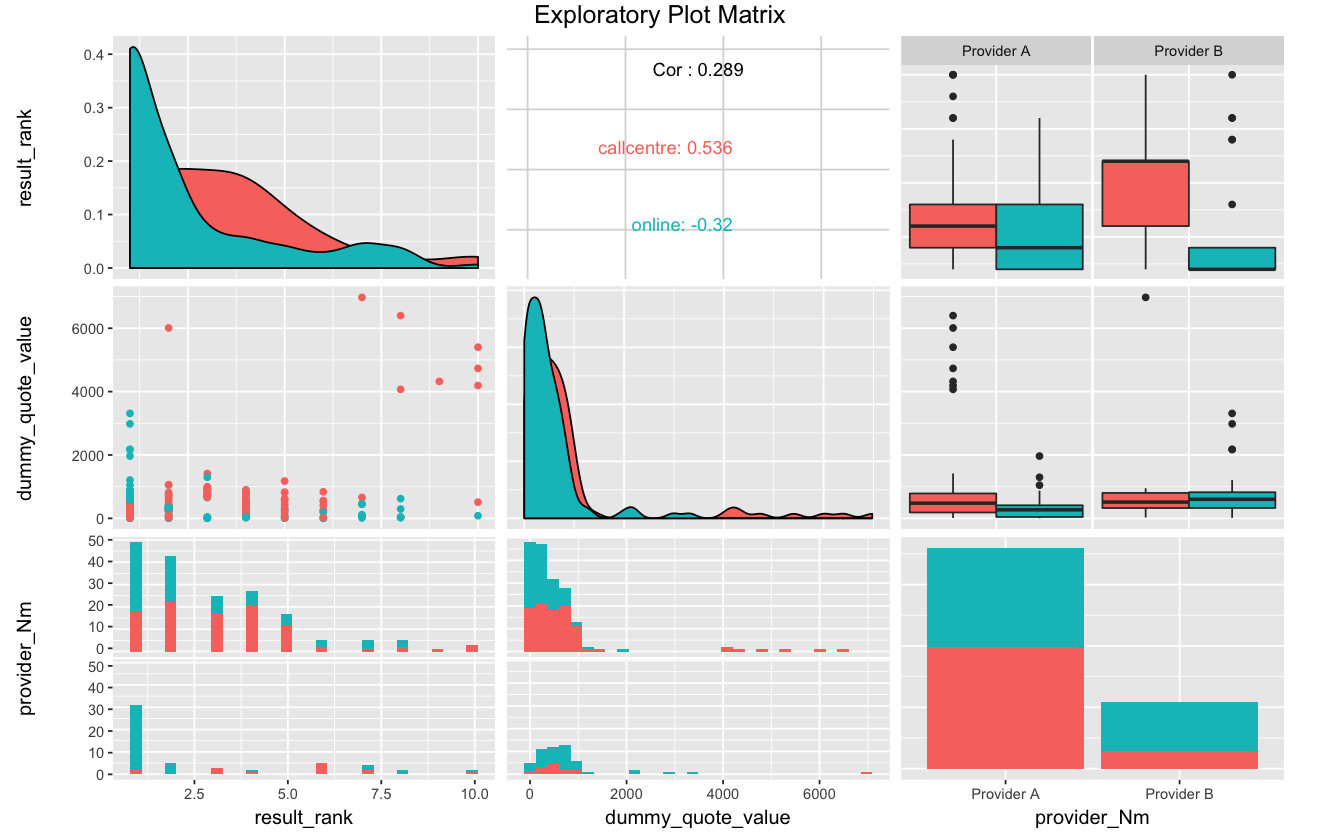

In [46]:
# Against Sale Source
ggpairs(data = dt[Sale_source !=""], 
        columns = c('result_rank','dummy_quote_value','provider_Nm'),
        mapping = aes(colour=Sale_source),
        title = 'Exploratory Plot Matrix')